# MLAI Session 8: Naive Bayes  <img src="diagrams/SimpleNaive.jpg" align="right" alt="Source: http://poster.keepcalmandposters.com/6979207.jpg" style="width:150px;"/>

## *Simple Probabilistic Classifiers*

### Haiping Lu -  COM4509/6509 MLAI2018 

### Based on slides by Neil D. Lawrence

## Overview
### Session 7 - Unsupervised Learning

* $k$-means for clustering
* PCA for dimensionality reduction
* The importance and power of mean and (co)variance, i.e., the first-order and second-order statistics

### This session
* Naive Bayes classifier
* The power of being simple, being naive

In [1]:
import pods
import mlai
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


/home/haiping/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Background

### Classification

* We are given a  data set containing 'inputs', $\mathbf{X}$ and 'targets', $\mathbf{y}$.
* Each data point consists of an input vector $\mathbf{x}_i$ and a class label, $y_i$.
* For binary classification assume $y_i$ should be either $1$ (yes) or $-1$ (no).
* Input vector can be thought of as features.


### Classification Examples

* Classifiying hand written digits from binary images (automatic zip code reading)
* Detecting faces in images (e.g. digital cameras).
* Who a detected face belongs to (e.g. Picasa, Facebook, DeepFace, GaussianFace)
* Classifying type of cancer given gene expression data.
* Categorization of document types (different types of news article on the internet)

### Reminder on the Term "Bayesian"

* We use Bayes' rule to invert probabilities in the Bayesian approach.
     * Bayesian is not named after Bayes' rule (v. common confusion). 
     * The term Bayesian refers to the treatment of the parameters as stochastic variables.
     * Proposed by @Laplace:memoire74 and @Bayes:doctrine63 independently.
     * For early statisticians this was very controversial (Fisher et al).
* **Question**: Is Naive Bayes presented below a Bayesian approach? (Recall the definition)

### Reminder on the Term "Bayesian"
* The use of Bayes' rule does *not* imply you are being Bayesian.
    * It is just an application of the product rule of probability.

## Bernoulli Naïve Bayes

### Regression vs Classification

* Recall: Algorithms have a *prediction* function (how to get o/p from i/p) and *objective* function (how to get the best model).
* For regression the *codomain* of the functions, $f(\mathbf{X})$ was the real numbers or sometimes real vectors. 
* In classification we are given an input vector, $\mathbf{x}$, and an associated label, $y$ which is a discrete value or a category  or the value $0$ or $1$. 
* Binary classification: $y$ takes the value $0$ or $1$, a basic fundamental problem (like binary numbers for computing)
* **Question**: If we have a binary classifier that can classifer an input into $0$ or $1$. Can we use it to some multiclass classification problems with more than two class labels? If yes, how?

### Bernoulli Distribution

* Binary classification: need a probability distribution for discrete variables (*bye Gaussian for a while*). 
* Discrete probability is in some ways easier:  $P(y=1) = \pi$ & specify distribution as a table.

| The class label $y$      | Probability of 0         | Probability of 1     |
| --- | --- | --- |
| $P(y)$ | $(1-\pi)$ | $\pi$ |

* Mathematically we use a trick to write it down as a single equation: use $y$ as a mathematical switch:
    $$
    P(y) = \pi^y (1-\pi)^{(1-y)}
    $$
This is the [Bernoulli distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution). 

### Mathematical Switch

* The Bernoulli distribution
    $$
    P(y) = \pi^y (1-\pi)^{(1-y)}
    $$
* Is a clever trick for switching probabilities, as code it would be
```python
def bernoulli(y_i, pi):
    if y_i == 1:
        return pi
    else:
        return 1-pi
```


### Jacob Bernoulli's Bernoulli
* Bernoulli described the Bernoulli distribution in terms of an 'urn' filled with balls.
* There are red and black balls. There is a fixed number of balls in the urn.
* The portion of red balls is given by $\pi$.

0.1 0.1 0.1
0.30000000000000004 0.1 0.1
0.5 0.1 0.1
0.7000000000000001 0.1 0.1
0.9 0.1 0.1
1.1 0.1 0.1
1.3000000000000003 0.1 0.1
1.5000000000000002 0.1 0.1
1.7000000000000002 0.1 0.1
1.9000000000000001 0.1 0.1
0.1 0.30000000000000004 0.1
0.30000000000000004 0.30000000000000004 0.1
0.5 0.30000000000000004 0.1
0.7000000000000001 0.30000000000000004 0.1
0.9 0.30000000000000004 0.1
1.1 0.30000000000000004 0.1
1.3000000000000003 0.30000000000000004 0.1
1.5000000000000002 0.30000000000000004 0.1
1.7000000000000002 0.30000000000000004 0.1
1.9000000000000001 0.30000000000000004 0.1
0.1 0.5 0.1
0.30000000000000004 0.5 0.1
0.5 0.5 0.1
0.7000000000000001 0.5 0.1
0.9 0.5 0.1
1.1 0.5 0.1
1.3000000000000003 0.5 0.1
1.5000000000000002 0.5 0.1
1.7000000000000002 0.5 0.1
1.9000000000000001 0.5 0.1
0.1 0.7000000000000001 0.1
0.30000000000000004 0.7000000000000001 0.1
0.5 0.7000000000000001 0.1


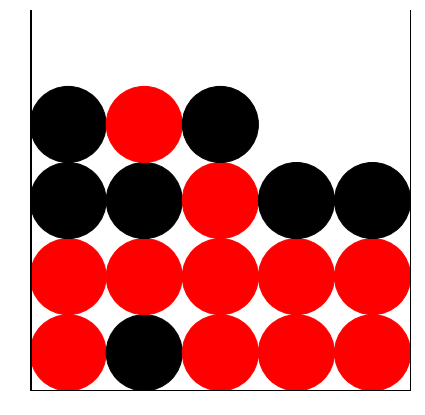

In [2]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(7,7))
ax.plot([0, 0, 1, 1], [1, 0, 0, 1], linewidth=3, color=[0,0,0])
ax.set_axis_off()
ax.set_aspect('equal')
black_prob = 0.3
ball_radius = 0.1
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
t = np.linspace(0, 2*np.pi, 24)
rows = 4
cols = round(1/ball_radius)
last_row_cols = 3;
for row in range(rows):
    if row == rows-1:
      cols = last_row_cols

    for col in range(cols):
        ball_x = col*2*ball_radius + ball_radius
        ball_y = row*2*ball_radius + ball_radius
        x = ball_x*np.ones(t.shape) + ball_radius*np.sin(t)
        y = ball_y*np.ones(t.shape) + ball_radius*np.cos(t);
  
        if np.random.rand()<black_prob:
            ball_color = [0, 0, 0]
        else: 
            ball_color = [1, 0, 0]
        plt.sca(ax)
        handle=plt.Circle((ball_x, ball_y), ball_radius, fill=True, color=ball_color, figure=fig)
        print(ball_x, ball_y, ball_radius)
        ax.add_artist(handle)


### Maximum Likelihood in the Bernoulli

* Assume $n$ data points, $\mathbf{y}$ is a binary vector of length $n$. 
* Assume each value was sampled independently from the Bernoulli distribution, given probability $\pi$
$$
p(\mathbf{y}|\pi) = \prod_{i=1}^n \pi^{y_i} (1-\pi)^{1-y_i}.
$$

### Negative Log Likelihood
* Minimize the negative log likelihood
    \begin{align*}E(\pi)& = -\log p(\mathbf{y}|\pi)\\ &= -\sum_{i=1}^{n} y_i \log \pi - \sum_{i=1}^n (1-y_i) \log(1-\pi),\end{align*}
* Take gradient with respect to the parameter $\pi$. 
    $$\frac{\text{d}E(\pi)}{\text{d}\pi} = -\frac{\sum_{i=1}^{n} y_i}{\pi}  + \frac{\sum_{i=1}^n (1-y_i)}{1-\pi},$$

### Fixed Point

* Stationary point: set derivative to zero
    $$0 = -\frac{\sum_{i=1}^{n} y_i}{\pi}  + \frac{\sum_{i=1}^n (1-y_i)}{1-\pi},$$

* Rearrange to form
    $$(1-\pi)\sum_{i=1}^{n} y_i =   \pi\sum_{i=1}^n (1-y_i),$$

* Giving
    $$\sum_{i=1}^{n} y_i =   \pi\left(\sum_{i=1}^n (1-y_i) + \sum_{i=1}^{n} y_i\right),$$

### Solution

* Recognise that $\sum_{i=1}^n (1-y_i) + \sum_{i=1}^{n} y_i = n$ so we have
    $$\pi = \frac{\sum_{i=1}^{n} y_i}{n}$$
* Estimate the probability associated with the Bernoulli by setting it to the number of observed positives, divided by the total length of $y$. 
* Makes intiutive sense. 
* What's your best guess of probability for coin toss is heads when you get 47 heads from 100 tosses?

### Bayes' Rule Reminder

$$\text{posterior} = \frac{\text{likelihood}\times\text{prior}}{\text{marginal likelihood}}$$

* Four components:
    1. Prior distribution
    2. Likelihood
    3. Posterior distribution
    4. Marginal likelihood


### Naive Bayes Classifiers

* First lecture: placing probability distributions (or densities) over all the **variables** of interest.
* **Question** Where to place probability distributions in a Bayesian treatment/approach?
* In Naive Bayes this is exactly what we do.
* Form a classification algorithm by modelling the *joint* density of our observations. 
* Need to make assumption about joint density.

### Assumptions about Density

* Make assumptions to reduce the number of parameters we need to optimise. 
* Given label data $\mathbf{y}$ and the inputs $\mathbf{X}$ could specify joint density of all potential values of $\mathbf{y}$ and $\mathbf{X}$, $p(\mathbf{y}, \mathbf{X})$. 
* If $\mathbf{X}$ and $\mathbf{y}$ are training data.
* If $\mathbf{x}^*$ is a test input and $y^*$ a test label we want
$$
p(y^*|\mathbf{X}, \mathbf{y}, \mathbf{x}^*),
$$ 

### Answer from Rules of Probability

* Compute this distribution using the product and sum rules. 

* Need the probability associated with all possible combinations of $\mathbf{y}$ and $\mathbf{X}$. 

* There are $2^n$ possible combinations for the vector $\mathbf{y}$ (**make sure you know why**)

* **The challenge**: What we need to solve the problem
    * Probability for each of these $2^n$ combinations must be jointly specified along with the joint density of the matrix $\mathbf{X}$
        * **Try**: If n=10, 100, 1000, 10000, how many combinations are there?
    * Also need to *extend* the density for any chosen test location $\mathbf{x}^*$. 

### Naive Bayes Assumptions

* In naive Bayes we make certain simplifying assumptions that allow us to perform all of the above in practice. 

1. Data Conditional Independence
2. Feature conditional independence
3. Marginal density for $y$.

### Data Conditional Independence

* Given model parameters $\boldsymbol{\theta}$ we assume that all data points in the model are **independent**. 
$$
p(y^*, \mathbf{x}^*, \mathbf{y}, \mathbf{X}|\boldsymbol{\theta}) = p(y^*, \mathbf{x}^*|\boldsymbol{\theta})\prod_{i=1}^n p(y_i, \mathbf{x}_i | \boldsymbol{\theta}).
$$
* This is a conditional independence assumption.
* We made similar assumptions for regression (where $\boldsymbol{\theta} = \left\{\mathbf{w},\sigma^2\right\}$.
* Here we assume *joint* density of $\mathbf{y}$ and $\mathbf{X}$ is independent across the data given the model parameters.



### Bayes Classifier

Computing posterior distribution in this case becomes easier, this is known as the 'Bayes classifier'.

### Feature Conditional Independence

* Particular to naive Bayes: assume *features* are also conditionally independent, given param *and* the label. 
    $$p(\mathbf{x}_i | y_i, \boldsymbol{\theta}) = \prod_{j=1}^p p(x_{i,j}|y_i, \boldsymbol{\theta})$$
  where $p$ is the dimensionality of our inputs.
* This is known as the *naive Bayes* assumption.
* Bayes classifier + feature conditional independence.


### Marginal Density for $y_i$

* To specify the joint distribution we also need the marginal for $p(y_i)$
    $$p(x_{i,j},y_i| \boldsymbol{\theta}) = p(x_{i,j}|y_i, \boldsymbol{\theta})p(y_i).$$
* Because $y_i$ is binary the *Bernoulli* density makes a suitable choice for our prior over $y_i$,
    $$p(y_i|\pi) = \pi^{y_i} (1-\pi)^{1-y_i}$$
  where $\pi$ now has the interpretation as being the *prior* probability that the classification should be positive. 

### Joint Density for Naive Bayes

This allows us to write down the full joint density of the training data,
$$
p(\mathbf{y}, \mathbf{X}|\boldsymbol{\theta}, \pi) = \prod_{i=1}^n \prod_{j=1}^p p(x_{i,j}|y_i, \boldsymbol{\theta})p(y_i|\pi)
$$
which can now be fit by maximum likelihood. 

### Maximum Likelihood

As normal we form our objective as the negative log likelihood,
$$
E(\boldsymbol{\theta}, \pi) = -\log p(\mathbf{y}, \mathbf{X}|\boldsymbol{\theta}, \pi) = -\sum_{i=1}^n \sum_{j=1}^p \log p(x_{i, j}|y_i, \boldsymbol{\theta}) - \sum_{i=1}^n \log p(y_i|\pi),
$$
which we note *decomposes* into two objective functions, one which is dependent on $\pi$ alone and one which is dependent on $\boldsymbol{\theta}$ alone so we have,
$$
E(\pi, \boldsymbol{\theta}) = E(\boldsymbol{\theta}) + E(\pi).
$$

* We can minimise them separately.

### Fit Prior

* We can minimize prior. For Bernoulli likelihood over the labels we have, 
    $$
    E(\pi) = - \sum_{i=1}^n\log p(y_i|\pi) = -\sum_{i=1}^n y_i \log \pi - \sum_{i=1}^n (1-y_i) \log (1-\pi)
    $$
* Solution from above (see earlier derivation) is
    $$
    \pi = \frac{\sum_{i=1}^n y_i}{n}.
    $$

### Fit Conditional 

* Minimize conditional distribution:
    $$
    E(\boldsymbol{\theta}) = -\sum_{i=1}^n \sum_{j=1}^p \log p(x_{i, j} |y_i, \boldsymbol{\theta}),
    $$

* Implies making an assumption about its form.
* The right assumption will depend on the data. 
* E.g. for real valued data, use a Gaussian
    $$
    p(x_{i, j} | y_i,\boldsymbol{\theta}) = \frac{1}{\sqrt{2\pi \sigma_{y_i,j}^2}} \exp \left(-\frac{(x_{i,j} - \mu_{y_i, j})^2}{\sigma_{y_i,j}^2}\right),
    $$

## Making Predictions

Naive Bayes has given us the class conditional densities: $p(\mathbf{x}_i | y_i, \boldsymbol{\theta})$. To make predictions with these densities we need to form the distribution given by
$$
P(y^*| \mathbf{y}, \mathbf{X}, \mathbf{x}^*, \boldsymbol{\theta})
$$

### Compute Posterior for Test Point Label

* We know that
    $$
    P(y^*| \mathbf{y}, \mathbf{X}, \mathbf{x}^*, \boldsymbol{\theta})p(\mathbf{y}, \mathbf{X}, \mathbf{x}^*|\boldsymbol{\theta}) = p(y*, \mathbf{y}, \mathbf{X}, \mathbf{x}^*| \boldsymbol{\theta})
    $$
* This implies
    $$
        P(y^*| \mathbf{y}, \mathbf{X}, \mathbf{x}^*, \boldsymbol{\theta}) = \frac{p(y*, \mathbf{y}, \mathbf{X}, \mathbf{x}^*| \boldsymbol{\theta})}{p(\mathbf{y}, \mathbf{X}, \mathbf{x}^*|\boldsymbol{\theta})}
    $$
 

### Compute Posterior for Test Point Label

* From conditional independence assumptions
$$
p(y^*, \mathbf{y}, \mathbf{X}, \mathbf{x}^*| \boldsymbol{\theta}) = \prod_{j=1}^p p(x^*_{j}|y^*, \boldsymbol{\theta})p(y^*|\pi)\prod_{i=1}^n \prod_{j=1}^p p(x_{i,j}|y_i, \boldsymbol{\theta})p(y_i|\pi)
$$
* We also need $$p(\mathbf{y}, \mathbf{X}, \mathbf{x}^*|\boldsymbol{\theta})$$ which can be found from $$p(y^*, \mathbf{y}, \mathbf{X}, \mathbf{x}^*| \boldsymbol{\theta})$$ 
* Using the *sum rule* of probability,
$$
p(\mathbf{y}, \mathbf{X}, \mathbf{x}^*|\boldsymbol{\theta}) = \sum_{y^*=0}^1 p(y^*, \mathbf{y}, \mathbf{X}, \mathbf{x}^*| \boldsymbol{\theta}).
$$

### Independence Assumptions

* From independence assumptions 
    $$p(\mathbf{y}, \mathbf{X}, \mathbf{x}^*| \boldsymbol{\theta}) = \sum_{y^*=0}^1 \prod_{j=1}^p p(x^*_{j}|y^*_i, \boldsymbol{\theta})p(y^*|\pi)\prod_{i=1}^n \prod_{j=1}^p p(x_{i,j}|y_i, \boldsymbol{\theta})p(y_i|\pi).
    $$
* Substitute both forms to recover,
    $$
    P(y^*| \mathbf{y}, \mathbf{X}, \mathbf{x}^*, \boldsymbol{\theta})  = \frac{\prod_{j=1}^p p(x^*_{j}|y^*_i, \boldsymbol{\theta})p(y^*|\pi)\prod_{i=1}^n \prod_{j=1}^p p(x_{i,j}|y_i, \boldsymbol{\theta})p(y_i|\pi)}{\sum_{y^*=0}^1 \prod_{j=1}^p p(x^*_{j}|y^*_i, \boldsymbol{\theta})p(y^*|\pi)\prod_{i=1}^n \prod_{j=1}^p p(x_{i,j}|y_i, \boldsymbol{\theta})p(y_i|\pi)}
    $$

### Cancelation

* Note training data terms cancel.
    $$
    p(y^*| \mathbf{x}^*, \boldsymbol{\theta}) = \frac{\prod_{j=1}^p p(x^*_{j}|y^*_i, \boldsymbol{\theta})p(y^*|\pi)}{\sum_{y^*=0}^1 \prod_{j=1}^p p(x^*_{j}|y^*_i, \boldsymbol{\theta})p(y^*|\pi)}
    $$
* This formula is also fairly straightforward to implement for different class conditional distributions.
* **Question**: If you use the result above to compute the posterior for $y^*$ directly, what problem will you have for a large $p$? How to avoid such problem?

### Summary 
Naive Bayes is making very simple assumptions about the data, in particular it is modeling the full *joint* probability of the data set, $p(\mathbf{y}, \mathbf{X} | \boldsymbol{\theta}, \pi)$ by very strong assumptions about factorizations that are unlikely to be true in practice. The data conditional independence assumption is common, and relies on a rich parameter vector to absorb all the information in the training data. The additional assumption of naive Bayes is that features are conditional indpenendent given the class label $y_i$ (and the parameter vector, $\boldsymbol{\theta}$. This is quite a strong assumption. However, it causes the objective function to decompose into parts which can be independently fitted to the different feature vectors, meaning it is very easy to fit the model to large data. It is also clear how we should handle *streaming* data and *missing* data. This means that the model can be run 'live', adapting parameters and information as it arrives. Indeed, the model is even capable of dealing with new *features* that might arrive at run time. Such is the strength of the modeling the joint probability density. However, the factorization assumption that allows us to do this efficiently is very strong and may lead to poor decision boundaries in practice.

### Reading

-   Chapter 5 of @Rogers:book11 up to pg 179 (Section 5.1, and 5.2 up to 5.2.2).